In [13]:
!pip install cmake dlib face_recognition numpy opencv-python

     |████████████████████████████████| 100.2MB 40kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=0fb89453a721dc34fc1eddcd6e8cc47b6e493ff4f4a9c83e720f3998e8c23d93
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
from google.colab import drive
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [7]:
%cd /content/drive/My Drive/Face Detector

/content/drive/My Drive/Face Detector


In [8]:
%ls

faces/  test1.jpg  test2.jpg


In [11]:
import dlib
import cv2
import os ,shutil
import numpy as np
from google.colab.patches import cv2_imshow

In [14]:
import face_recognition as fr

In [15]:
def get_encoded_faces():
  encoded={}
  for dirpath, dname,fname in os.walk("./faces"):
    for f in fname:
      if f.endswith(".jpg") or f.endswith(".png"):
        face=fr.load_image_file("faces/"+ f)
        encoding = fr.face_encodings(face)[0]
        encoded[f.split(".")[0]] = encoding
  return encoded
    

In [16]:
x = get_encoded_faces()

In [17]:
x

{'ayush': array([-0.15317154,  0.05999623,  0.07351299, -0.0220266 ,  0.00593225,
        -0.01804285, -0.05331309, -0.03693272,  0.2311122 , -0.15956804,
         0.1887712 ,  0.04744113, -0.14299203, -0.15171075, -0.06174278,
         0.12978378, -0.05927601, -0.18572405, -0.08249029, -0.10410638,
         0.0146171 ,  0.03245908,  0.03284277,  0.07679819, -0.11795071,
        -0.3981427 , -0.08412191, -0.13154332,  0.06051495, -0.10975519,
        -0.02815341,  0.05031779, -0.2218509 , -0.01774775, -0.02244057,
         0.1230514 ,  0.07619833,  0.05819406,  0.18865553,  0.06229983,
        -0.19909588,  0.0287131 ,  0.00217576,  0.29717717,  0.11258569,
         0.03414497,  0.0124909 , -0.04138292,  0.12822962, -0.1496909 ,
         0.10083885,  0.11699122,  0.12600335,  0.00700865,  0.10901183,
        -0.07479232, -0.01588229,  0.05975065, -0.18641672,  0.09668499,
        -0.00819431, -0.08956861, -0.08494352, -0.00547783,  0.19147161,
         0.12622499, -0.08329453, -0.16864

In [58]:
def classify_face(im):
  faces=get_encoded_faces()
  faces_encoded = list(faces.values())
  known_face_names = list(faces.keys())

  img=cv2.imread(im)
  face_locations = fr.face_locations(img)
  unknown_face_encodings = fr.face_encodings(img,face_locations)

  face_names =[]
  for face_encoding in unknown_face_encodings:
    name = "Unknown"
    matches = fr.compare_faces(faces_encoded,face_encoding)

    face_distances = fr.face_distance(faces_encoded,face_encoding)
    best_matche_index = np.argmin(face_distances)
    if matches[best_matche_index]:
      name = known_face_names[best_matche_index]
    face_names.append(name)

    for (top,right,bottom,left), name in zip(face_locations, face_names):
      cv2.rectangle(img,(left-20,top-20),(right+20,bottom+20),(255,0,0),2)
      cv2.rectangle(img,(left-20,bottom-15),(right+20,bottom+20),(255,0,0),cv2.FILLED)
      cv2.putText(img,name,(left-20,bottom+15),cv2.FONT_HERSHEY_PLAIN,1,(255,255,255),1)
  while True:
    cv2_imshow(img)
    return face_names

In [59]:
def learning(image):
  c_face = classify_face(image)
  if "Unknown" in c_face:
    que = input("Unknown Image would you like to add it to the system: ")
    if que == "yes" or que == "Yes":
      imageFileName = input("Enter Name of the image: ")
      shutil.move(imageFileName,'/content/drive/My Drive/Face Detector/faces')
      print(learning(image))
    else:
      print(c_face)
  else:
    print(c_face)


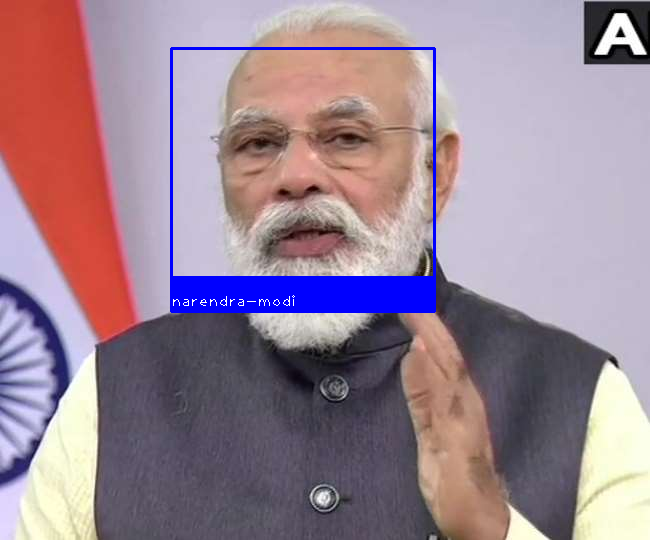

['narendra-modi']


In [60]:
learning("test3.jpg")